📊 Shape of the DataFrame: (2452, 61)
            0          1          2         3          4          5  \
0 -570.000305  29.231855 -28.572050 -1.171939  -8.968902 -10.660740   
1 -542.260498  33.782990  -3.803622  3.091985  -9.681706  -6.023739   
2 -687.706604  39.088589  -5.860187  6.923982 -10.534793  -5.880984   
3 -550.819153  37.232449  -5.966861  4.732355  -2.008578  -9.404682   
4 -573.296753  45.841038  -9.815438  4.286420  -8.331691  -3.489434   

           6          7          8         9  ...        51         52  \
0 -13.617955 -19.157396  -4.766867 -3.655524  ...  0.497664  12.476468   
1  -8.644806 -11.424565 -11.615021 -1.289250  ...  0.424412  18.173931   
2  -6.757151  -8.113562  -3.685668 -5.643714  ...  0.371718  16.162948   
3 -14.451254 -14.265596  -8.414461  0.758800  ...  0.399976  16.634672   
4  -5.228768 -11.024238  -5.628939 -1.996801  ...  0.484061  15.979445   

          53         54         55         56         57         58        59  \
0  19.2261

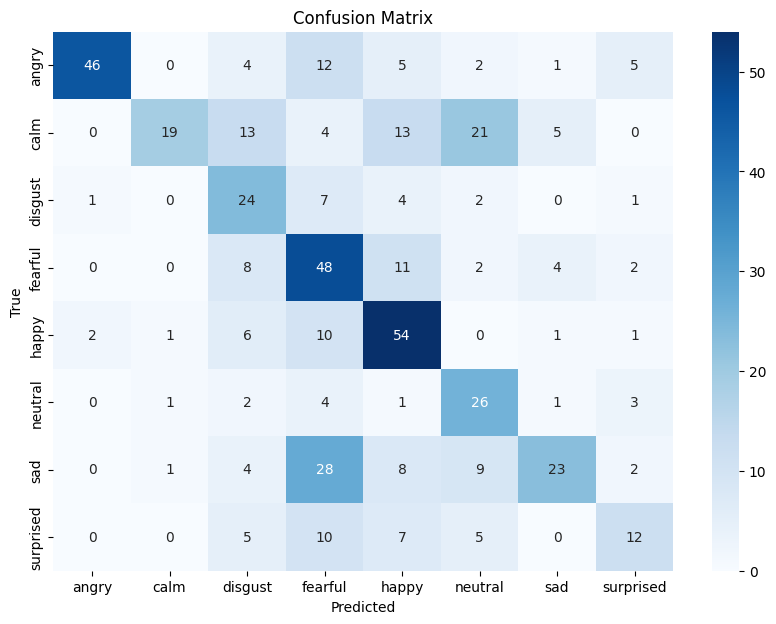

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score


 #1. Load the features and labels CSV
df = pd.read_csv("ravdess_features.csv")

# 2. Check the content of the CSV (IMPORTANT DEBUG STEP)
print("📊 Shape of the DataFrame:", df.shape)
print(df.head())

# Stop and warn if it's empty
if df.shape[0] == 0:
    raise ValueError("The CSV file is empty. Check your preprocessing step.")

# 3. Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# 4. Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. 80-20 train-validation split with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"✅ Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

#training random forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#making prediction
y_pred = clf.predict(X_val)

#evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

#detailed report
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Load the features and labels CSV
df = pd.read_csv("ravdess_features.csv")

# 2. Check the content of the CSV (IMPORTANT DEBUG STEP)
print("📊 Shape of the DataFrame:", df.shape)
print(df.head())

# Stop and warn if it's empty
if df.shape[0] == 0:
    raise ValueError("The CSV file is empty. Check your preprocessing step.")

# 3. Separate features and labels
X = df.drop("label", axis=1)
y = df["label"]

# 4. Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. 80-20 train-validation split with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"✅ Training samples: {len(X_train)}, Validation samples: {len(X_val)}")

from sklearn.neural_network import MLPClassifier

# Initialize and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_val)

# Evaluation (same as before)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


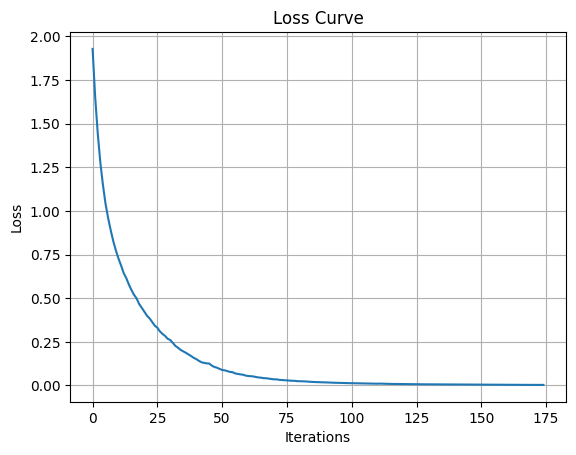

Accuracy: 0.7861507128309573
F1 Score: 0.7883331766558901

Classification Report:
               precision    recall  f1-score   support

       angry       0.88      0.85      0.86        75
        calm       0.83      0.83      0.83        75
     disgust       0.65      0.72      0.68        39
     fearful       0.85      0.77      0.81        75
       happy       0.87      0.79      0.83        75
     neutral       0.62      0.76      0.68        38
         sad       0.76      0.77      0.77        75
   surprised       0.68      0.72      0.70        39

    accuracy                           0.79       491
   macro avg       0.77      0.78      0.77       491
weighted avg       0.79      0.79      0.79       491



In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(256, 64), max_iter=500, random_state=7)
mlp.fit(X_train_scaled, y_train)

import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Predict
y_pred = mlp.predict(X_val_scaled)

# Print metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))

In [8]:
# Predict
y_pred = mlp.predict(X_train_scaled)

# Print metrics
print("Accuracy:", accuracy_score(y_train, y_pred))
print("F1 Score:", f1_score(y_train, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_train, y_pred, target_names=le.classes_))

Accuracy: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

       angry       1.00      1.00      1.00       301
        calm       1.00      1.00      1.00       301
     disgust       1.00      1.00      1.00       153
     fearful       1.00      1.00      1.00       301
       happy       1.00      1.00      1.00       301
     neutral       1.00      1.00      1.00       150
         sad       1.00      1.00      1.00       301
   surprised       1.00      1.00      1.00       153

    accuracy                           1.00      1961
   macro avg       1.00      1.00      1.00      1961
weighted avg       1.00      1.00      1.00      1961



Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 64), 'learning_rate': 'constant'}
Best Weighted F1 Score: 0.7003503858432217

Validation Set Report:
               precision    recall  f1-score   support

       angry       0.79      0.85      0.82        75
        calm       0.77      0.84      0.80        75
     disgust       0.50      0.51      0.51        39
     fearful       0.70      0.65      0.68        75
       happy       0.82      0.60      0.69        75
     neutral       0.69      0.66      0.68        38
         sad       0.68      0.76      0.72        75
   surprised       0.56      0.62      0.59        39

    accuracy                           0.71       491
   macro avg       0.69      0.69      0.68       491
weighted avg       0.71      0.71      0.71       491



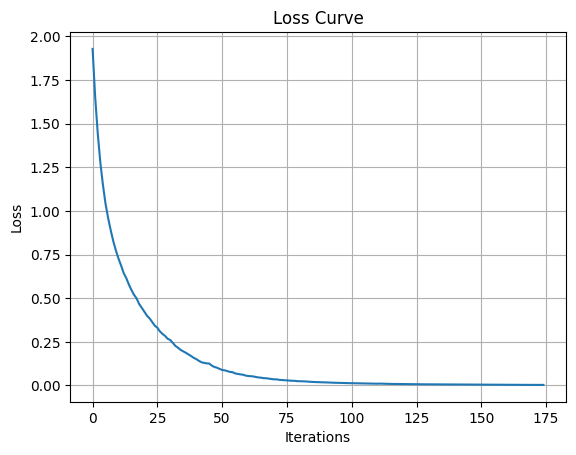

Accuracy: 0.7861507128309573
F1 Score: 0.7883331766558901

Classification Report:
               precision    recall  f1-score   support

       angry       0.88      0.85      0.86        75
        calm       0.83      0.83      0.83        75
     disgust       0.65      0.72      0.68        39
     fearful       0.85      0.77      0.81        75
       happy       0.87      0.79      0.83        75
     neutral       0.62      0.76      0.68        38
         sad       0.76      0.77      0.77        75
   surprised       0.68      0.72      0.70        39

    accuracy                           0.79       491
   macro avg       0.77      0.78      0.77       491
weighted avg       0.79      0.79      0.79       491



In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score

# Define F1 scorer (weighted)
f1_scorer = make_scorer(f1_score, average='weighted')

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(256, 64), (128, 64), (64,), (128,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create GridSearchCV
grid = GridSearchCV(
    MLPClassifier(max_iter=1000, early_stopping=True, random_state=42),
    param_grid=param_grid,
    scoring=f1_scorer,       # YOU choose the metric
    cv=3,                    # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                # Use all CPU cores
)

# Fit the model
grid.fit(X_train_scaled, y_train)

# Show best config
print("Best Parameters:", grid.best_params_)
print("Best Weighted F1 Score:", grid.best_score_)

# 3. Retrain best model from scratch on full training set
final_model = MLPClassifier(
    hidden_layer_sizes=(256, 64),
    activation='relu',
    alpha=0.0001,
    learning_rate='constant',
    early_stopping=True,
    max_iter=1000,
    random_state=42
)

final_model.fit(X_train_scaled, y_train)

# Evaluate best model on validation set
from sklearn.metrics import classification_report

best_model = grid.best_estimator_
y_pred = best_model.predict(X_val_scaled)
print("\nValidation Set Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))


# Initialize and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(256, 64), max_iter=500, random_state=7)
mlp.fit(X_train_scaled, y_train)

import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Predict
y_pred = mlp.predict(X_val_scaled)

# Print metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (512, 256), 'mlp__learning_rate': 'constant'}
Best Weighted F1 Score (CV): 0.725454350345382

Validation Set Classification Report:

              precision    recall  f1-score   support

       angry       0.85      0.85      0.85        75
        calm       0.82      0.80      0.81        75
     disgust       0.57      0.67      0.61        39
     fearful       0.80      0.68      0.73        75
       happy       0.87      0.72      0.79        75
     neutral       0.61      0.74      0.67        38
         sad       0.70      0.79      0.74        75
   surprised       0.63      0.67      0.65        39

    accuracy                           0.75       491
   macro avg       0.73      0.74      0.73       491
weighted avg       0.76      0.75      0.75       491

Validation Accuracy: 0.7494908350305499
Validation Weighted F1

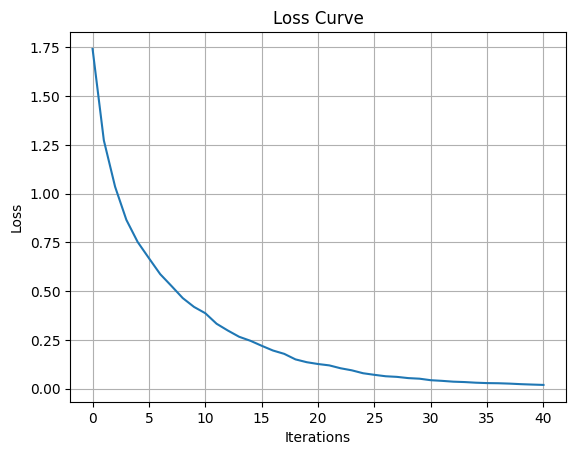

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(256, 64), mlp__learning_rate=constant, mlp__max_iter=1500, mlp__n_iter_no_change=10; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(256, 64), mlp__learning_rate=adaptive, mlp__max_iter=1000, mlp__n_iter_no_change=20; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate=constant, mlp__max_iter=1500, mlp__n_iter_no_change=10; total time=   0.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate=adaptive, mlp__max_iter=1000, mlp__n_iter_no_change=10; total time=   0.8s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate=adaptive, mlp__max_iter=1500, mlp__n_iter_no_change=20; total time=   1.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(512, 512), mlp__learning_ra

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt



# 1. Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(max_iter=1000, early_stopping=True, random_state=42))
])

# 2. Define parameter grid (prefix with 'mlp__')
param_grid = {
    'mlp__hidden_layer_sizes': [(256, 64), (512, 256)],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

# 3. Scoring
f1_scorer = make_scorer(f1_score, average='weighted')

# 4. GridSearchCV
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# 5. Fit
grid.fit(X_train, y_train)  # No need to manually scale or resample


# 6. Results
print("Best Parameters:", grid.best_params_)
print("Best Weighted F1 Score (CV):", grid.best_score_)

# 7. Predict on validation set
y_pred = grid.predict(X_val)

print("\nValidation Set Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=le.classes_))

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Validation Weighted F1 Score:", f1_score(y_val, y_pred, average='weighted'))

# 8. Loss curve (optional)
best_mlp = grid.best_estimator_.named_steps['mlp']
plt.plot(best_mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold


# 1. Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(max_iter=1500, early_stopping=True, random_state=42))
])

#2. Define parameter grid (prefix with 'mlp__')
param_grid = {
    'mlp__hidden_layer_sizes': [(512, 256), (256, 128), (128, 64), (512, 512), (256, 256, 128)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.0005, 0.001],
    'mlp__alpha': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__max_iter': [1500, 2000],
    'mlp__early_stopping': [True]
}

# 3. Scoring
f1_scorer = make_scorer(f1_score, average='weighted')

cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipe, param_grid, cv=7, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


# 4. GridSearchCV
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1
)

from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = grid_search.best_estimator_.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_val, y_pred))


# 5. Fit
grid.fit(X_train, y_train)  # No need to manually scale or resample


# 6. Results
print("Best Parameters:", grid.best_params_)
print("Best Weighted F1 Score (CV):", grid.best_score_)

# 7. Predict on validation set
y_pred = grid.predict(X_val)

print("\nValidation Set Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=le.classes_))

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Validation Weighted F1 Score:", f1_score(y_val, y_pred, average='weighted'))

# 8. Loss curve (optional)
best_mlp = grid.best_estimator_.named_steps['mlp']
plt.plot(best_mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
ConfusionMatrixDisplay(cm).plot()
# import joblib
# joblib.dump(grid_search.best_estimator_, "best_mlp_model.pkl")



Fitting 7 folds for each of 200 candidates, totalling 1400 fits
Accuracy: 0.769857433808554
F1 Score: 0.7706103850994752

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        75
           1       0.81      0.84      0.82        75
           2       0.63      0.56      0.59        39
           3       0.73      0.80      0.76        75
           4       0.92      0.72      0.81        75
           5       0.65      0.74      0.69        38
           6       0.81      0.77      0.79        75
           7       0.63      0.74      0.68        39

    accuracy                           0.77       491
   macro avg       0.75      0.75      0.75       491
weighted avg       0.78      0.77      0.77       491

Fitting 7 folds for each of 200 candidates, totalling 1400 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_n

KeyboardInterrupt: 

Fitting 7 folds for each of 192 candidates, totalling 1344 fits

[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 512), mlp__learning_rate=adaptive, mlp__max_iter=2000; total time=   5.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 256, 128), mlp__learning_rate=constant, mlp__max_iter=2000; total time=   1.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 256, 128), mlp__learning_rate=adaptive, mlp__max_iter=1500; total time=   1.7s
[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 256, 128), mlp__learning_rate=adaptive, mlp__max_iter=2000; total time=   2.9s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate=constant, mlp__max_iter=2000; total time=   3.4s
[CV] END mlp__activat

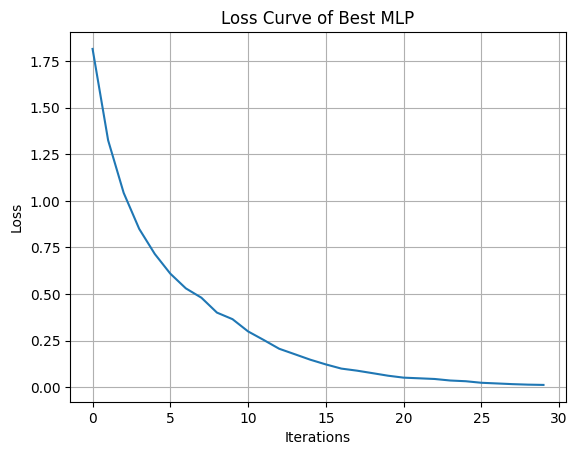

In [4]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(early_stopping=True, random_state=42))
])

# 2. Hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(512, 256, 128), (256, 128, 64), (512, 256), (256, 128)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-5, 5e-5, 1e-4],                      # Lower regularization
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__solver': ['adam', 'sgd'],                        # Trying both solvers
    'mlp__momentum': [0.9, 0.95],                          # Only for SGD, ignored by adam
    'mlp__max_iter': [3000]                                # More iterations
}

# 3. Scorer and CV
f1_scorer = make_scorer(f1_score, average='weighted')
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# 4. Grid Search
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1
)

# 5. Train
grid.fit(X_train, y_train)

# 6. Evaluate
y_pred = grid.predict(X_val)

print("\nBest Params:", grid.best_params_)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Validation Weighted F1 Score:", f1_score(y_val, y_pred, average='weighted'))
print("\nValidation Classification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))

# 7. Plot Loss Curve
best_mlp = grid.best_estimator_.named_steps['mlp']
plt.plot(best_mlp.loss_curve_)
plt.title("Loss Curve of Best MLP")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold


# 1. Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(max_iter=1500, early_stopping=True, random_state=42))
])

# 2. Define parameter grid (prefix with 'mlp__')
param_grid = {
    'mlp__hidden_layer_sizes': [(512, 256), (256, 128), (128, 64), (512, 512), (256, 256, 128)],
    'mlp__activation': ['relu', 'tanh'],

    'mlp__alpha': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__max_iter': [1500, 2000],
    'mlp__early_stopping': [True]
}




# 3. Scoring
f1_scorer = make_scorer(f1_score, average='weighted')



cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)






# 4. GridSearchCV
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1
)

from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred = grid_search.best_estimator_.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_val, y_pred))


# 5. Fit
grid.fit(X_train, y_train)  # No need to manually scale or resample


# 6. Results
print("Best Parameters:", grid.best_params_)
print("Best Weighted F1 Score (CV):", grid.best_score_)

# 7. Predict on validation set
y_pred = grid.predict(X_val)

print("\nValidation Set Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=le.classes_))

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Validation Weighted F1 Score:", f1_score(y_val, y_pred, average='weighted'))

# 8. Loss curve (optional)
best_mlp = grid.best_estimator_.named_steps['mlp']
plt.plot(best_mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
ConfusionMatrixDisplay(cm).plot()

joblib.dump(grid.best_estimator_, "best_mlp_model.pkl")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 64), 'learning_rate': 'constant'}
Best Weighted F1 Score: 0.7003503858432217

Validation Set Report:
               precision    recall  f1-score   support

       angry       0.79      0.85      0.82        75
        calm       0.77      0.84      0.80        75
     disgust       0.50      0.51      0.51        39
     fearful       0.70      0.65      0.68        75
       happy       0.82      0.60      0.69        75
     neutral       0.69      0.66      0.68        38
         sad       0.68      0.76      0.72        75
   surprised       0.56      0.62      0.59        39

    accuracy                           0.71       491
   macro avg       0.69      0.69      0.68       491
weighted avg       0.71      0.71      0.71       491



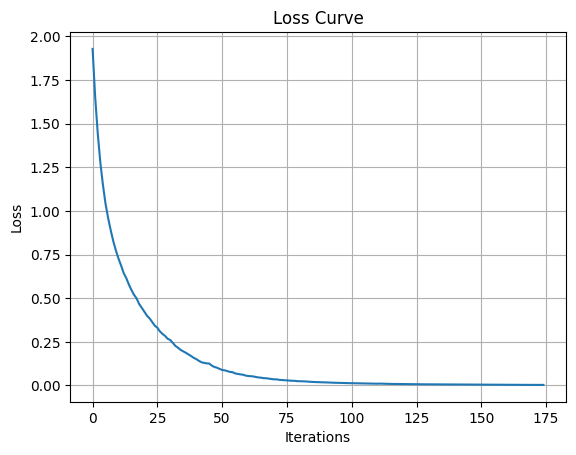

Accuracy: 0.7861507128309573
F1 Score: 0.7883331766558901

Classification Report:
               precision    recall  f1-score   support

       angry       0.88      0.85      0.86        75
        calm       0.83      0.83      0.83        75
     disgust       0.65      0.72      0.68        39
     fearful       0.85      0.77      0.81        75
       happy       0.87      0.79      0.83        75
     neutral       0.62      0.76      0.68        38
         sad       0.76      0.77      0.77        75
   surprised       0.68      0.72      0.70        39

    accuracy                           0.79       491
   macro avg       0.77      0.78      0.77       491
weighted avg       0.79      0.79      0.79       491



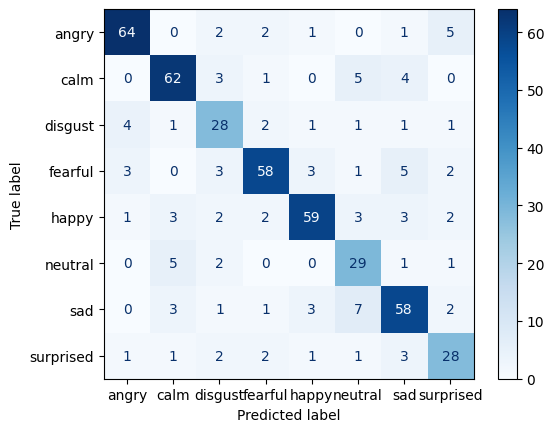

In [5]:
 from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score

# Define F1 scorer (weighted)
f1_scorer = make_scorer(f1_score, average='weighted')

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(256, 64), (128, 64), (64,), (128,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create GridSearchCV
grid = GridSearchCV(
    MLPClassifier(max_iter=1000, early_stopping=True, random_state=42),
    param_grid=param_grid,
    scoring=f1_scorer,       # YOU choose the metric
    cv=3,                    # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                # Use all CPU cores
)

# Fit the model
grid.fit(X_train_scaled, y_train)

# Show best config
print("Best Parameters:", grid.best_params_)
print("Best Weighted F1 Score:", grid.best_score_)

# 3. Retrain best model from scratch on full training set
final_model = MLPClassifier(
    hidden_layer_sizes=(256, 64),
    activation='relu',
    alpha=0.0001,
    learning_rate='constant',
    early_stopping=True,
    max_iter=1000,
    random_state=42
)

final_model.fit(X_train_resampled, y_train_resampled)


# Evaluate best model on validation set
from sklearn.metrics import classification_report

best_model = grid.best_estimator_
y_pred = best_model.predict(X_val_scaled)
print("\nValidation Set Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))


# Initialize and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(256, 64), max_iter=500, random_state=7)
mlp.fit(X_train_scaled, y_train)

import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Predict
y_pred = mlp.predict(X_val_scaled)

# Print metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))
#  Confusion matrix & per-class accuracy
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap='Blues')
plt.show()


Fitting 7 folds for each of 200 candidates, totalling 1400 fits
[CV] END mlp__activation=relu, mlp__alpha=1e-05, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate=constant, mlp__max_iter=1500; total time=   3.3s
[CV] END mlp__activation=relu, mlp__alpha=1e-05, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate=adaptive, mlp__max_iter=1500; total time=   2.6s
[CV] END mlp__activation=relu, mlp__alpha=1e-05, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 256), mlp__learning_rate=adaptive, mlp__max_iter=2000; total time=   2.9s
[CV] END mlp__activation=relu, mlp__alpha=1e-05, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 128), mlp__learning_rate=adaptive, mlp__max_iter=1500; total time=   1.2s
[CV] END mlp__activation=relu, mlp__alpha=1e-05, mlp__early_stopping=True, mlp__hidden_layer_sizes=(128, 64), mlp__learning_rate=constant, mlp__max_iter=1500; total time=   0.6s
[CV] END mlp__activation=relu, mlp__alpha=

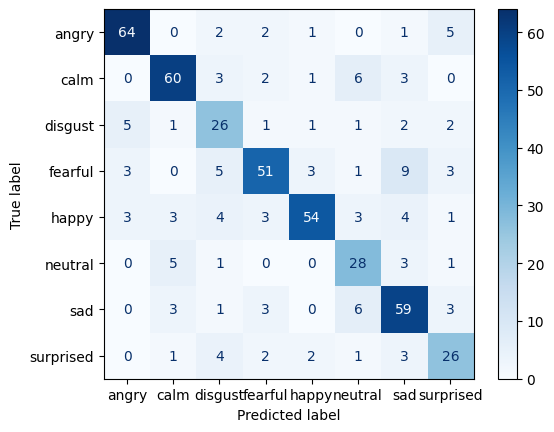


Per-class accuracy:
     angry: 85.33%
      calm: 80.00%
   disgust: 66.67%
   fearful: 68.00%
     happy: 72.00%
   neutral: 73.68%
       sad: 78.67%
 surprised: 66.67%


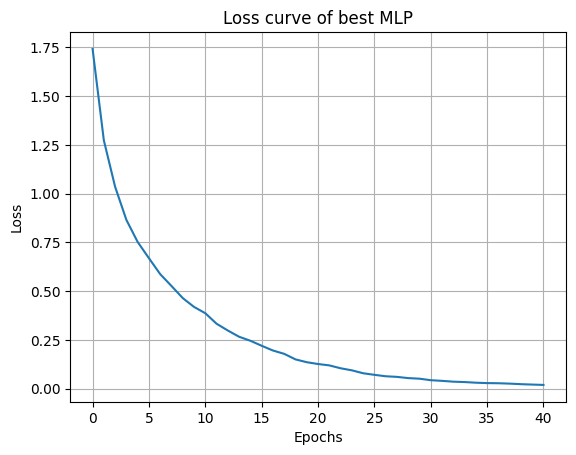


[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_layer_sizes=(128, 64), mlp__learning_rate=adaptive, mlp__max_iter=2000; total time=   0.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 512), mlp__learning_rate=constant, mlp__max_iter=1500; total time=   7.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_layer_sizes=(512, 512), mlp__learning_rate=adaptive, mlp__max_iter=2000; total time=   5.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 256, 128), mlp__learning_rate=constant, mlp__max_iter=1500; total time=   1.5s
[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_layer_sizes=(256, 256, 128), mlp__learning_rate=constant, mlp__max_iter=1500; total time=   1.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0005, mlp__early_stopping=True, mlp__hidden_la

In [3]:
# ----------------- 1. Imports ------------------
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, make_scorer
)
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# -------- 2. Assume X_train, X_val, y_train, y_val, le are defined --------

# 3. Build pipeline (scaling → SMOTE → MLP)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote',  SMOTE(random_state=42)),
    ('mlp',    MLPClassifier(early_stopping=True, random_state=42))
])

# 4. Hyper-parameter grid  (NO duplicate keys)
param_grid = {
    'mlp__hidden_layer_sizes': [
        (512, 256), (256, 128), (128, 64), (512, 512), (256, 256, 128)
    ],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [1e-5, 5e-5, 1e-4, 5e-4, 1e-3],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__max_iter': [1500, 2000],
    'mlp__early_stopping': [True]
}

# 5. Stratified 7-fold CV & weighted-F1 scorer
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1
)

# 6. Fit
grid.fit(X_train, y_train)

# 7. Best params & CV score
print("Best parameters :", grid.best_params_)
print("Best CV F1-score:", grid.best_score_)

# 8. Validation-set evaluation
y_pred = grid.predict(X_val)

print("\nValidation report\n")
print(classification_report(y_val, y_pred, target_names=le.classes_))
print("Overall accuracy :", accuracy_score(y_val, y_pred))
print("Weighted F1-score:", f1_score(y_val, y_pred, average='weighted'))

# 9. Confusion matrix & per-class accuracy
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap='Blues')
plt.show()

per_class_acc = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class accuracy:")
for cls, acc in zip(le.classes_, per_class_acc):
    print(f"{cls:>10}: {acc*100:.2f}%")

# 10. Loss curve
best_mlp = grid.best_estimator_.named_steps['mlp']
plt.figure()
plt.plot(best_mlp.loss_curve_)
plt.title("Loss curve of best MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (256, 64), 'mlp__learning_rate': 'constant'}
Best Weighted F1 Score: 0.6923274334821192

Validation Set Classification Report:

              precision    recall  f1-score   support

       angry       0.81      0.80      0.81        75
        calm       0.79      0.83      0.81        75
     disgust       0.52      0.59      0.55        39
     fearful       0.77      0.73      0.75        75
       happy       0.82      0.63      0.71        75
     neutral       0.65      0.79      0.71        38
         sad       0.77      0.77      0.77        75
   surprised       0.65      0.77      0.71        39

    accuracy                           0.74       491
   macro avg       0.73      0.74      0.73       491
weighted avg       0.75      0.74      0.74       491

Validation Accuracy: 0.7433808553971487
Validation Weighted F1 Sc

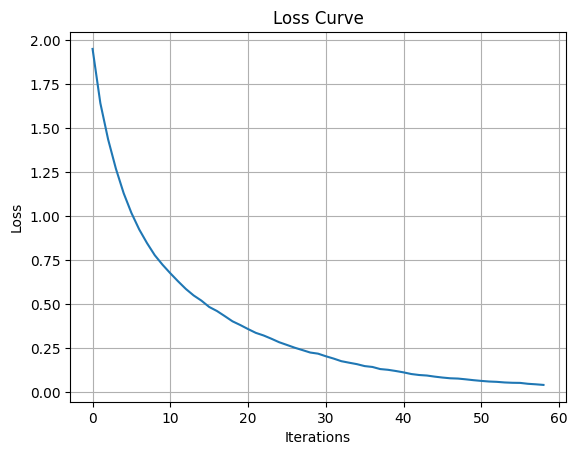

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128, 64), mlp__learning_rate=adaptive; total time=   0.4s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(64,), mlp__learning_rate=adaptive; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128,), mlp__learning_rate=constant; total time=   0.2s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(128, 64), mlp__learning_rate=constant; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(128, 64), mlp__learning_rate=adaptive; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(256, 64), mlp__learning_rate=constant; total time=   0.6s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(128,), mlp__learning_rate=constant; total time=   0.3s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(128, 64), 

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assume X_train, y_train, X_val, y_val, and le (label encoder or class names) are already defined

# Create a pipeline that scales data, applies SMOTE, and trains MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(max_iter=1000, early_stopping=True, random_state=42))
])

# Parameter grid for hyperparameter tuning (note the 'mlp__' prefix)
param_grid = {
    'mlp__hidden_layer_sizes': [(256, 64), (128, 64), (64,), (128,)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

# Setup GridSearchCV with weighted F1 scoring and 3-fold CV
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model on raw training data (no manual scaling or SMOTE here)
grid.fit(X_train, y_train)

# Print best parameters and best weighted F1 score
print("Best Parameters:", grid.best_params_)
print("Best Weighted F1 Score:", grid.best_score_)

# Predict on validation data (raw features, pipeline handles scaling etc.)
y_val_pred = grid.predict(X_val)

# Print classification report and metrics for validation set
print("\nValidation Set Classification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Weighted F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

# OPTIONAL: Plot loss curve of the best MLP model
final_mlp = grid.best_estimator_.named_steps['mlp']
plt.plot(final_mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 64), 'learning_rate': 'constant'}
Best Weighted F1 Score from GridSearchCV: 0.7003503858432217

🎯 Final Validation Accuracy: 0.7067209775967414
🎯 Final Validation F1 Score: 0.7054330768911548

📊 Classification Report:
               precision    recall  f1-score   support

       angry       0.79      0.85      0.82        75
        calm       0.77      0.84      0.80        75
     disgust       0.50      0.51      0.51        39
     fearful       0.70      0.65      0.68        75
       happy       0.82      0.60      0.69        75
     neutral       0.69      0.66      0.68        38
         sad       0.68      0.76      0.72        75
   surprised       0.56      0.62      0.59        39

    accuracy                           0.71       491
   macro avg       0.69      0.69      0.68       491
weighted avg       0.71      0.71     

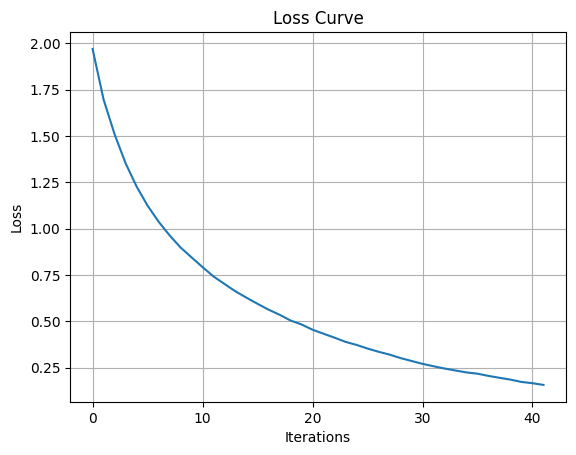

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, make_scorer
import matplotlib.pyplot as plt

# === SCALE DATA ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# === DEFINE PARAMETER GRID ===
param_grid = {
    'hidden_layer_sizes': [(256, 64), (128, 64), (64,), (128,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# === DEFINE SCORER ===
f1_scorer = make_scorer(f1_score, average='weighted')

# === GRIDSEARCH ===
grid = GridSearchCV(
    MLPClassifier(max_iter=1000, early_stopping=True, random_state=42),
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# === FIT MODEL ===
grid.fit(X_train_scaled, y_train)

# === BEST MODEL ===
best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)
print("Best Weighted F1 Score from GridSearchCV:", grid.best_score_)

# === EVALUATE ON VALIDATION SET ===
y_pred = best_model.predict(X_val_scaled)

print("\n🎯 Final Validation Accuracy:", accuracy_score(y_val, y_pred))
print("🎯 Final Validation F1 Score:", f1_score(y_val, y_pred, average='weighted'))
print("\n📊 Classification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))

# === LOSS CURVE ===
plt.plot(best_model.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (512, 256), 'learning_rate': 'adaptive'}
Best Weighted F1 Score (CV): 0.797646104107293

Classification Report:
               precision    recall  f1-score   support

       angry       0.82      0.85      0.84        75
        calm       0.80      0.84      0.82        75
     disgust       0.59      0.62      0.60        39
     fearful       0.78      0.63      0.70        75
       happy       0.79      0.73      0.76        75
     neutral       0.61      0.74      0.67        38
         sad       0.76      0.72      0.74        75
   surprised       0.59      0.69      0.64        39

    accuracy                           0.74       491
   macro avg       0.72      0.73      0.72       491
weighted avg       0.74      0.74      0.74       491

Overall Accuracy: 0.7372708757637475
Weighted F1 Score: 0.7377123509685852

Confusion Matrix:
 [[6

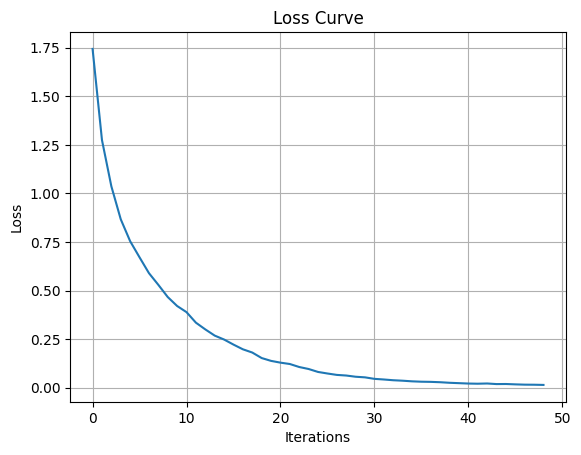

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(512, 128, 64), learning_rate=adaptive; total time=   1.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(512, 256), learning_rate=adaptive; total time=   2.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(512, 256), learning_rate=adaptive; total time=   2.0s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(512, 256), learning_rate=adaptive; total time=   2.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(512, 256), learning_rate=adaptive; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(256, 128), learning_rate=adaptive; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(256, 128), learning_rate=adaptive; total time=   0.8s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(512, 128, 64), learning_rate=adaptive; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(512, 128, 64), learning_

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# STEP 2: Balance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# STEP 3: Wider, deeper, more aggressive hyperparams
param_grid = {
    'hidden_layer_sizes': [
        (512, 256), (256, 128), (512, 128, 64)
    ],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['adaptive'],
}

grid = GridSearchCV(
    MLPClassifier(max_iter=2000, early_stopping=True, random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# STEP 4: Train
grid.fit(X_train_resampled, y_train_resampled)

# STEP 5: Predict on validation set
y_pred = grid.predict(X_val_scaled)

# STEP 6: Metrics
print("Best Parameters:", grid.best_params_)
print("Best Weighted F1 Score (CV):", grid.best_score_)

f1 = f1_score(y_val, y_pred, average='weighted')
acc = accuracy_score(y_val, y_pred)

print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=le.classes_))
print("Overall Accuracy:", acc)
print("Weighted F1 Score:", f1)

# STEP 7: Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

# STEP 8: Per-class accuracy
print("\nPer-Class Accuracy:")
per_class_acc = cm.diagonal() / cm.sum(axis=1)
for i, class_name in enumerate(le.classes_):
    print(f"{class_name:>10}: {per_class_acc[i]*100:.2f}%")

# STEP 9: Loss curve
final_mlp = grid.best_estimator_
plt.plot(final_mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
